In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.tokenize import word_tokenize
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('all_tickets.csv')

In [3]:
df.head(10)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4
5,mail,verification warning hi has got attached pleas...,1,4,3,7,89,3,4
6,mail,please dear looks blacklisted receiving mails ...,1,4,3,87,89,3,4
7,prod servers tunneling,prod tunneling va la tunneling la host si la s...,1,6,22,21,95,3,4
8,access request,dear modules report report cost thank much reg...,1,4,1,7,66,3,4
9,reset passwords for our client and,passwords client dear please passwords thank,1,5,2,76,4,3,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             47837 non-null  object
 1   body              48549 non-null  object
 2   ticket_type       48549 non-null  int64 
 3   category          48549 non-null  int64 
 4   sub_category1     48549 non-null  int64 
 5   sub_category2     48549 non-null  int64 
 6   business_service  48549 non-null  int64 
 7   urgency           48549 non-null  int64 
 8   impact            48549 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


In [5]:
df.isna().sum()

title               712
body                  0
ticket_type           0
category              0
sub_category1         0
sub_category2         0
business_service      0
urgency               0
impact                0
dtype: int64

In [6]:
df['ticket_type'].value_counts()

1    34621
0    13928
Name: ticket_type, dtype: int64

In [7]:
df['category'].unique()

array([ 4,  6,  5,  7, 11,  1,  8, 12,  3,  9,  0, 10,  2], dtype=int64)

In [8]:
df['category'].value_counts()

4     34061
5      9634
6      2628
7       921
11      612
8       239
9       191
3       137
1        72
12       45
0         4
2         3
10        2
Name: category, dtype: int64

In [9]:
df['sub_category1'].unique()

array([ 2, 22, 13,  3,  1, 15, 39, 36, 33, 17, 30, 50, 16, 56, 55, 11, 43,
        6, 58, 29, 26, 42, 37,  8, 24, 45, 25,  0, 52, 28, 31, 46, 38, 20,
        4, 48, 18,  5, 44, 21, 51,  9, 12, 35, 32, 10, 14, 41, 54, 27, 53,
       49, 40, 57, 23, 19, 34,  7, 47], dtype=int64)

In [10]:
df['sub_category2'].unique()

array([ 21,   7,  76,  87,  60,  94,  88,  86, 105,  51,   0,   3,  91,
       107, 108,  61,  95,  73,  12,   6,  16,   9,  70, 102,  33,  26,
       104,  68,  44,  93,  27, 100,  46,  92,  75,   8,  10,  19,  85,
        36,  39,  31, 114,  79,   1,  41,  11,  23,  74,  65, 106, 111,
        77,  29,  40,  53,  89,  63,  71,  98,  82,  62,  78,  50, 110,
        22, 112, 101,   4,  55,  30,  90,  83,  54,  66,  17,  57,  32,
        59,  20,   2,  14,  80,  97,  13,  24,  43, 109,  84,  35,  69,
        42,  96, 113,  37,  28,  48,  67,  81,   5,  34,  18,  58,  99,
        25,  45,  72,  49,  38,  52,  64, 103,  15,  47,  56], dtype=int64)

In [11]:
df['business_service'].unique()

array([ 71,  26,  32,   4,  89,  95,  66,  67,  74,  40,  36,  10,  52,
        73,  70,  38,  43,  46,  19,  92,  51,  49,  63,   2,  87,  96,
        48,  29,  27,  41,  65,   7,  68, 100,  24,  88,  56,   6,  58,
        21,   3,  59,  72,  62,  25,  45,  57,  99,  53,   5,  20,  23,
        64,  93,  42,  98,   9,  34,  30,  78,  94,  91,  16,  83,  11,
        28,  69,  90,  15,  14,  97,   8, 101,  33,  79,  76,  12,  39,
        50,  84,  85,  13,  81,  60,  61,  22,  18,   1,  54,  44,  82,
        86,  77,  35, 102,  55,  75,  47,  37,  80,  31,  17,   0],
      dtype=int64)

In [12]:
df['urgency'].value_counts()

3    34621
1     6748
2     5528
0     1652
Name: urgency, dtype: int64

In [13]:
df['impact'].value_counts()

4    34621
3    13184
0      471
2      228
1       45
Name: impact, dtype: int64

In [14]:
relevant_cols = ['body','category']

In [15]:
df = df[relevant_cols]

In [16]:
df.head()

,body,category
0,hi since recruiter lead permission approve req...,4
1,icon dear please setup icon per icon engineers...,6
2,work experience user hi work experience studen...,5
3,requesting meeting hi please help follow equip...,5
4,re expire days hi ask help update passwords co...,4


In [17]:
df.shape

(48549, 2)

In [18]:
df['category'].unique()

array([ 4,  6,  5,  7, 11,  1,  8, 12,  3,  9,  0, 10,  2], dtype=int64)

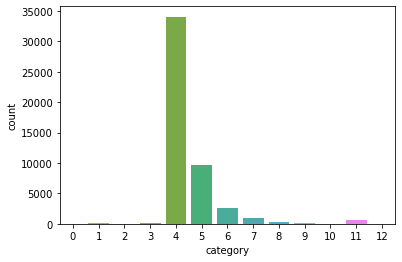

In [19]:
ax = sns.countplot(df['category'], data=df)

In [20]:
# replace categories with minimum number of text data with 0
df['category'].replace([7,11,8,9,3,1,12,0,2,10],0,inplace=True)

In [21]:
df['category'].value_counts()

4    34061
5     9634
6     2628
0     2226
Name: category, dtype: int64

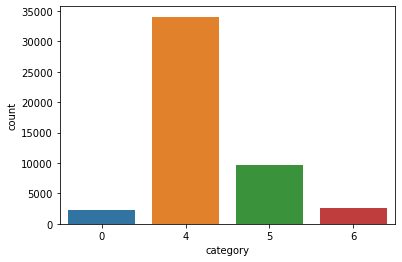

In [22]:
ax = sns.countplot(df['category'], data=df)

In [23]:
def clean_message(message, perform_stemming = False):
    '''
    Input:
        message: a string containing a message.
    Output:
        messages_cleaned: a list of words containing the processed message. 

    '''
    #Remove Punctuation
    messages_cleaned = re.sub(r'[^\w\s]', '', message)
    
    #Remove Links
    messages_cleaned = re.sub(r'https?://\S+', '', messages_cleaned)
    
    #Lower Case
    messages_cleaned = messages_cleaned.lower()
    
    #Tokenize
    messages_cleaned = word_tokenize(messages_cleaned)
    
    #Remove Stopwords
    stop_words_list = stopwords.words('english')
    for token in messages_cleaned:
        if token in stop_words_list:
            messages_cleaned.remove(token)
    
    #Perform Stemming
    if perform_stemming == True:
        temp = messages_cleaned.copy()
        messages_cleaned.clear()
        for token in temp:
            messages_cleaned.append(PorterStemmer().stem(token))

    return messages_cleaned

In [24]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Dvija
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Dvija
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
df['clean_body'] = df['body'].apply(lambda row: clean_message(row))

In [26]:
df

,body,category,clean_body
0,hi since recruiter lead permission approve req...,4,"[hi, since, recruiter, lead, permission, appro..."
1,icon dear please setup icon per icon engineers...,6,"[icon, dear, please, setup, icon, per, icon, e..."
2,work experience user hi work experience studen...,5,"[work, experience, user, hi, work, experience,..."
3,requesting meeting hi please help follow equip...,5,"[requesting, meeting, hi, please, help, follow..."
4,re expire days hi ask help update passwords co...,4,"[expire, days, hi, ask, help, update, password..."
...,...,...,...
48544,sent tuesday july re git space for hi got righ...,4,"[sent, tuesday, july, git, space, hi, got, rig..."
48545,sent july error hi guys can you help out with ...,4,"[sent, july, error, hi, guys, you, help, with,..."
48546,sent tuesday july connection issues hello have...,5,"[sent, tuesday, july, connection, issues, hell..."
48547,sent tuesday july error hello guys have receiv...,4,"[sent, tuesday, july, error, hello, guys, rece..."


In [27]:
train, test = train_test_split(df, test_size=0.3, stratify=df['category'], random_state=42)

In [28]:
print(train.shape)
print(test.shape)

(33984, 3)
(14565, 3)


In [29]:
# y = df['category']
# X = df['clean_body']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [30]:
pip install numpy requests nlpaug

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Dvija' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
#conda install -c makcedward nlpaug
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dvija Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Dvija
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


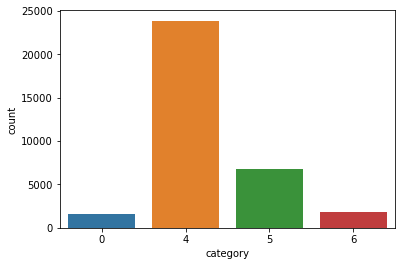

In [32]:
ax = sns.countplot('category', data=train)

In [33]:
train['category'].value_counts()

4    23842
5     6744
6     1840
0     1558
Name: category, dtype: int64

In [ ]:
aug = naw.SynonymAug()

def augmented_data(train,category,n):
    augmented_data=[]    
    for index, row in train.iterrows():
        if(row['category'] == category):
                str1 = ' '.join(row['clean_body'])
                d= aug.augment(str1, n)
                for j in d:
                    augmented_data.append(clean_message(j))
    
    return augmented_data
            
            
m=augmented_data(df,5,2)
n=augmented_data(df,0,10)
o=augmented_data(df,6,8)

In [ ]:
# print(len(m))
# print(len(n))
# print(len(o))
# m_new=[]
# n_new=[]
# o_new=[]
# for i in m:
#   m_new.append(clean_message(i))

# for i in n:
#   n_new.append(clean_message(i))

# for i in o:
#   o_new.append(clean_message(i))


In [ ]:
new=train.iloc[:,1:]

category_5=[]
for i in range(0,len(m)):
    category_5.append(5)


df_5 = pd.DataFrame(list(zip(category_5, m)),
               columns =['category', 'clean_body'])
 
category_6=[]
for i in range(0,len(o)):
    category_6.append(6)

df_6 = pd.DataFrame(list(zip(category_6, o)),
               columns =['category', 'clean_body'])

category_0=[]
for i in range(0,len(n)):
    category_0.append(0)

df_0 = pd.DataFrame(list(zip(category_0, n)),
               columns =['category', 'clean_body'])

In [ ]:
frames = [new,df_5,df_6,df_0]
train = pd.concat(frames)

In [ ]:
train

In [ ]:
ax = sns.countplot('category', data=train)

In [ ]:
train['category'].value_counts()

In [ ]:
train.to_csv("train.csv")
test.to_csv("test.csv")